In [24]:
# Libraries
# Libraries being used\n",
''' To install new libraries all install commands should bei n the anaconda terminal.
    "Open Anaconda Prompt -> type: activate projectName -> then the install command (pip or conda)'''
import pandas as pd
#import scikit
import os
import numpy as np
# pip install fredapi
# https://github.com/mortada/fredapi documentation
from fredapi import Fred

In [2]:
# Loading Data sets
df = pd.read_csv(os.path.join("data", "Log Differences GDPC1.csv"))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Columns: 333 entries, datestr to GDPC1_20190101logdifference
dtypes: float64(328), int64(2), object(3)
memory usage: 611.4+ KB


In [3]:
# Stripping down douplicate columns
column_counts = {}
for column_name in df.columns:
    if column_name[:-15] in column_counts:
        column_counts[column_name[:-15]].append(column_name)
    else:
        column_counts[column_name[:-15]] = [column_name]
        
duplicates = []
for column_name in column_counts:
    if len(column_counts[column_name]) > 1:
        duplicates.append(column_counts[column_name])

# First index always has non-time series columns
for i in duplicates[1:]:
    for key in i[:-1]:
        df.drop(key, axis="columns", inplace=True)
        
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Columns: 323 entries, datestr to GDPC1_20190101logdifference
dtypes: float64(318), int64(2), object(3)
memory usage: 593.1+ KB


In [4]:
# Trimming all column names (removing day and string logdifference)
df = df.rename(columns = {original:original[:-15] for original in df.columns if "GDP" in original})

print(df.columns)
df.info()

Index(['datestr', 'daten', 'newyq', 'Year', 'qrt', 'GDPC1_199112',
       'GDPC1_199201', 'GDPC1_199202', 'GDPC1_199203', 'GDPC1_199204',
       ...
       'GDPC1_201804', 'GDPC1_201805', 'GDPC1_201806', 'GDPC1_201807',
       'GDPC1_201808', 'GDPC1_201809', 'GDPC1_201810', 'GDPC1_201811',
       'GDPC1_201812', 'GDPC1_201901'],
      dtype='object', length=323)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Columns: 323 entries, datestr to GDPC1_201901
dtypes: float64(318), int64(2), object(3)
memory usage: 593.1+ KB


In [5]:
# Save all data sets
df.to_csv(os.path.join("data", "Cleaned_log_diff_GDP.csv"))

In [6]:
# Now dealing with unrate
unrate = pd.read_csv(os.path.join("data", "UNRATE vintages.csv"))
t = unrate.transpose()
t.columns = t.iloc[0]
t.columns
#t
#temp = t['datestr']
#t.groupby(pd.PeriodIndex(df.columns[1:], freq='Q'), axis=1).mean()


Index(['1960-01-01', '1960-02-01', '1960-03-01', '1960-04-01', '1960-05-01',
       '1960-06-01', '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
       ...
       '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
       '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01'],
      dtype='object', name='datestr', length=707)

In [7]:
t.iloc[0]

datestr
1960-01-01    1960-01-01
1960-02-01    1960-02-01
1960-03-01    1960-03-01
1960-04-01    1960-04-01
1960-05-01    1960-05-01
1960-06-01    1960-06-01
1960-07-01    1960-07-01
1960-08-01    1960-08-01
1960-09-01    1960-09-01
1960-10-01    1960-10-01
1960-11-01    1960-11-01
1960-12-01    1960-12-01
1961-01-01    1961-01-01
1961-02-01    1961-02-01
1961-03-01    1961-03-01
1961-04-01    1961-04-01
1961-05-01    1961-05-01
1961-06-01    1961-06-01
1961-07-01    1961-07-01
1961-08-01    1961-08-01
1961-09-01    1961-09-01
1961-10-01    1961-10-01
1961-11-01    1961-11-01
1961-12-01    1961-12-01
1962-01-01    1962-01-01
1962-02-01    1962-02-01
1962-03-01    1962-03-01
1962-04-01    1962-04-01
1962-05-01    1962-05-01
1962-06-01    1962-06-01
                 ...    
2016-06-01    2016-06-01
2016-07-01    2016-07-01
2016-08-01    2016-08-01
2016-09-01    2016-09-01
2016-10-01    2016-10-01
2016-11-01    2016-11-01
2016-12-01    2016-12-01
2017-01-01    2017-01-01
2017-02-01    201

In [14]:
unemp = pd.read_csv(os.path.join("data", "Differenced Unemployment.csv"))
gdp = pd.read_csv(os.path.join("data", "CSV changed indices to numeric.csv"))

# Mapping out first graph index 0 - 127 gdp
# Unemployment goes 1-128


In [68]:
from sklearn import linear_model
# Prep linear model
y = unemp['UNRATE_19911206difference'].values[1:127]
x = gdp['i_gdpc1_19911204logdifference'].values[0:126]
x = x.reshape(len(x), 1)
y = y.reshape(len(y), 1)
regr = linear_model.LinearRegression()

regr.fit(x,y)

predict_x = gdp['i_gdpc1_19940428logdifference'].values[127:136].reshape(9,1)

predict_y = regr.predict(predict)
#regr.predict([unemp['UNRATE_19940401difference'][128:137]])

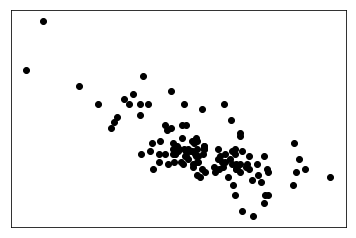

In [73]:
import matplotlib.pyplot as plt

plt.scatter(x,y, color='black')
#plt.scatter(predict_x, predict_y, color='blue', linewidth=3)
#plt.scatter(predict_x, unemp['UNRATE_19940401difference'].values[127:136], color='red')
plt.xticks(())
plt.yticks(())
plt.show()